In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


# Load MNIST dataset

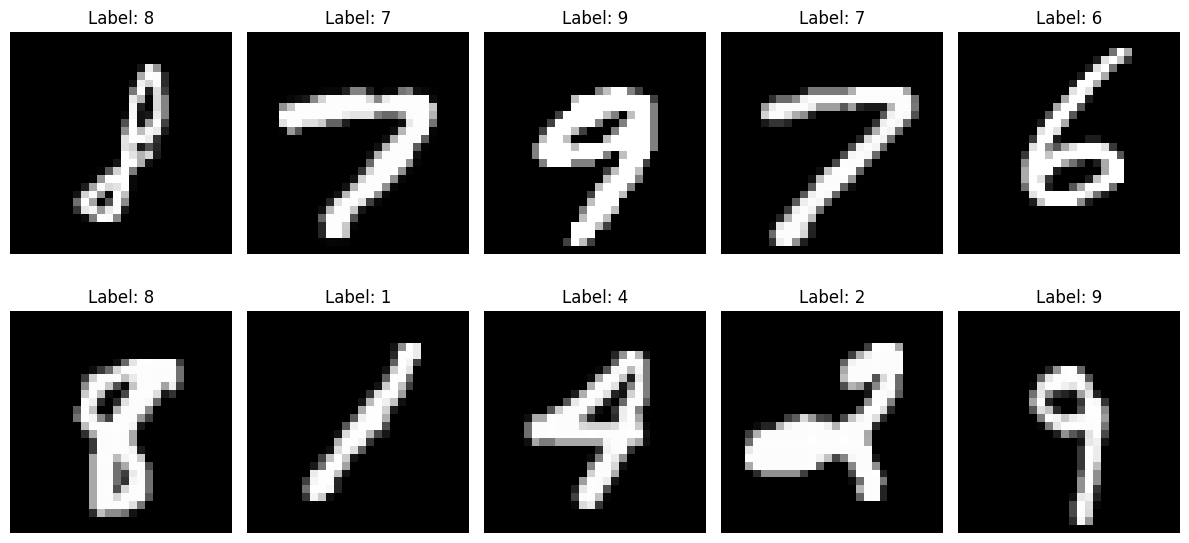

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_images = 10
random_indices = np.random.randint(0, len(x_train), num_images)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Reshape and normalize input data


In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


# One-hot encode the target labels


In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Split training data into train and validation sets

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define data augmentation parameters

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2
)

# Fit the datagen on training data
datagen.fit(x_train)


# Define CNN model architecture


In [22]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Compile the model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with original MNIST dataset

In [24]:
history_orig = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
375/375 [==============================] - 34s 84ms/step - loss: 0.2511 - accuracy: 0.9258 - val_loss: 0.0932 - val_accuracy: 0.9701
Epoch 2/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0572 - val_accuracy: 0.9838
Epoch 3/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0414 - val_accuracy: 0.9866
Epoch 5/10
375/375 [==============================] - 28s 74ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 6/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0402 - val_accuracy: 0.9886
Epoch 7/10
375/375 [==============================] - 26s 69ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0372 - val_accuracy:

# Train the model with augmented MNIST dataset


In [25]:
model_augmented = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_augmented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_augmented.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Fit the augmented data using data augmentation generator


In [26]:
history_augmented = model_augmented.fit(datagen.flow(x_train, y_train, batch_size=128),
                                       steps_per_epoch=len(x_train)/128, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
375/375 [==============================] - 47s 120ms/step - loss: 0.5150 - accuracy: 0.8400 - val_loss: 0.1040 - val_accuracy: 0.9668
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.1861 - accuracy: 0.9439 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 3/10
375/375 [==============================] - 59s 157ms/step - loss: 0.1353 - accuracy: 0.9585 - val_loss: 0.0662 - val_accuracy: 0.9786
Epoch 4/10
375/375 [==============================] - 42s 111ms/step - loss: 0.1120 - accuracy: 0.9656 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 5/10
375/375 [==============================] - 43s 115ms/step - loss: 0.0929 - accuracy: 0.9710 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 6/10
375/375 [==============================] - 46s 123ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.0370 - val_accuracy: 0.9894
Epoch 7/10
375/375 [==============================] - 49s 130ms/step - loss: 0.0767 - accuracy: 0.9762 - val_loss: 0.0303 - val_ac

# Plot accuracy

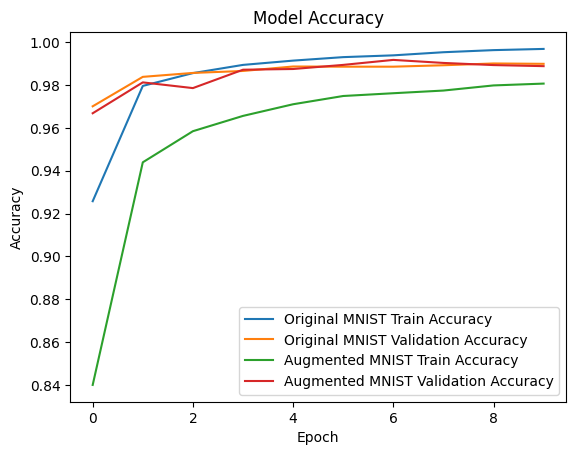

In [27]:
plt.plot(history_orig.history['accuracy'], label='Original MNIST Train Accuracy')
plt.plot(history_orig.history['val_accuracy'], label='Original MNIST Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented MNIST Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented MNIST Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
